In [2]:
import matplotlib.pyplot as plt
import numpy as np


def Evalue(numberlist:list) ->float:
    return sum(numberlist)/len(numberlist)

def cov(a:list,b:list) ->float:
    prdctlist = [a[i]*b[i] for i in range(len(a))]
    return Evalue(prdctlist)

def timeseriesread(filename) ->list:
    datalist = []
    openf = open(filename,"r")
    for line in openf:
        datalist.append(float(str(line).strip()))
    return datalist

def dot_num(numberlist:list,deltaT:int) ->list:
    dotrtlist = [(numberlist[i+1]-numberlist[i])/deltaT for i in range(len(numberlist)-1)]
    return dotrtlist

def dot_differ_list(numberlist:list,deltaT) ->list:
    dot_mean = Evalue(dot_num(numberlist,deltaT))
    dot_differ_rt = [dot_num(numberlist,deltaT)[i]-dot_mean for i in range(len(dot_num(numberlist,deltaT)))]
    return dot_differ_rt

def cov_d(a:list,b:list) ->float:
    dot_differ = dot_differ_list(b,1)
    prdctlist = [a[i]*dot_differ[i] for i in range(len(dot_differ))]
    return Evalue(prdctlist)

def T_2_to_1(one:list,two:list):
    c11 = cov(one,one)
    c12 = cov(one,two)
    c22 = cov(two,two)
    c2d1 = cov_d(two,one)
    c1d1 = cov_d(one,one)
    upper = c11*c12*c2d1-c12*c12*c1d1
    lower = c11*c11*c22-c11*c12*c12

    return upper/lower

def dot_differ_month(month_n:list,month_n1:list) ->list:
    difference = [month_n1[i]-month_n[i] for i in range(len(month_n1))]
    mean = Evalue(difference)
    dot_differ_list = [difference[i]-mean for i in range(len(difference))]
    return dot_differ_list

def cov_d_month(i_list:list,j_list:list,j1_list):
    dot_differ = dot_differ_month(j_list,j1_list)
    prdctlist = [i_list[i]*dot_differ[i] for i in range(len(dot_differ))]
    return Evalue(prdctlist)

def T_monthly(one:[["month_i"],["month_i1"]],two:[["month_j"],["month_j1"]]):
    c11 = cov(one[0],one[0])
    c12 = cov(one[0],two[0])
    c22 = cov(two[0],two[0])
    c2d1 = cov_d_month(two[0],one[0],one[1])
    c1d1 = cov_d_month(one[0],one[0],one[1])
    upper = c11*c12*c2d1-c12*c12*c1d1
    lower = c11*c11*c22-c11*c12*c12
    return upper/lower

In [3]:
cni_mri = timeseriesread("ts_cni_MRI.data")
nino3_mri = timeseriesread("ts_nino3_MRI.data")
cni_ESM2= timeseriesread("ts_cni_CanESM2.data")
nino3_ESM2 = timeseriesread("ts_nino3_CanESM2.data")
print(len(cni_mri)/12,len(nino3_mri),len(cni_ESM2),len(cni_ESM2))

140.0 1680 1680 1680


In [4]:
nino3_to_ca_mri = T_2_to_1(cni_mri,nino3_mri)
ca_to_nino3_mri = T_2_to_1(nino3_mri,cni_mri)

nino3_to_ca_ESM2 = T_2_to_1(cni_ESM2,nino3_ESM2)
ca_to_nino3_ESM2 = T_2_to_1(nino3_ESM2,cni_ESM2)

In [5]:
print("T E to C, T C to E from mri")
print(nino3_to_ca_mri)
print(ca_to_nino3_mri)
print()
print("T E to C, T C to E from esm2")
print(nino3_to_ca_ESM2)
print(ca_to_nino3_ESM2)

T E to C, T C to E from mri
-0.0013508689772326874
0.00871221266636984

T E to C, T C to E from esm2
0.010049753113844566
0.0004694374416335114


In [6]:
print("first 50 years")
nino3_to_ca_mri_first50yrs = T_2_to_1(cni_mri[:601],nino3_mri[:601])
ca_to_nino3_mri_first50yrs = T_2_to_1(nino3_mri[:601],cni_mri[:601])

nino3_to_ca_ESM2_first50yrs = T_2_to_1(cni_ESM2[:601],nino3_ESM2[:601])
ca_to_nino3_ESM2_first50yrs = T_2_to_1(nino3_ESM2[:601],cni_ESM2[:601])

print("last 50 years")
nino3_to_ca_mri_last50yrs = T_2_to_1(cni_mri[1080:],nino3_mri[1080:])
ca_to_nino3_mri_last50yrs = T_2_to_1(nino3_mri[1080:],cni_mri[1080:])

nino3_to_ca_ESM2_last50yrs = T_2_to_1(cni_ESM2[1080:],nino3_ESM2[1080:])
ca_to_nino3_ESM2_last50yrs = T_2_to_1(nino3_ESM2[1080:],cni_ESM2[1080:])

print(len(nino3_ESM2[1080:]))
print()
print("T E to C, T C to E first 50years from mri")
print(str(nino3_to_ca_mri_first50yrs*1000)[:6]+"*10^-3")
print(str(ca_to_nino3_mri_first50yrs*1000)[:6]+"*10^-3")
print()
print("T E to C, T C to E last 50 years from mri")
print(str(nino3_to_ca_mri_last50yrs*1000)[:6]+"*10^-3")
print(str(ca_to_nino3_mri_last50yrs*1000)[:6]+"*10^-3")
print()
print("T E to C, T C to E first 50 years from ESM2")
print(str(nino3_to_ca_ESM2_first50yrs*1000)[:6]+"*10^-3")
print(str(ca_to_nino3_ESM2_first50yrs*1000)[:6]+"*10^-3")
print()
print("T E to C, T C to E last 50 years from ESM2")
print(str(nino3_to_ca_ESM2_last50yrs*1000)[:6]+"*10^-3")
print(str(ca_to_nino3_ESM2_last50yrs*1000)[:6]+"*10^-3")


first 50 years
last 50 years
600

T E to C, T C to E first 50years from mri
0.8121*10^-3
5.5429*10^-3

T E to C, T C to E last 50 years from mri
-3.514*10^-3
9.7907*10^-3

T E to C, T C to E first 50 years from ESM2
11.900*10^-3
-0.414*10^-3

T E to C, T C to E last 50 years from ESM2
32.707*10^-3
-6.084*10^-3


In [7]:
TEtoCfor140_mri = [] ### T El nino to California nino for each 50 years with 10-year gap for 140 years from MRI data
TCtoEfor140_mri = [] ### T California Nino to El nino for each 50 years with 10-year gap for 140 years from MRI data

for i in range(10):
    TEtoC = T_2_to_1(cni_mri[120*i:120*i+601],nino3_mri[120*i:120*i+601])
    TCtoE = T_2_to_1(nino3_mri[120*i:120*i+601],cni_mri[120*i:120*i+601])
    print(TEtoC*1000,TCtoE*1000,len(cni_mri[120*i:120*i+601]))
    TEtoCfor140_mri.append(TEtoC)
    TCtoEfor140_mri.append(TCtoE)
    
print(len(TEtoCfor140_mri))
print(len(TCtoEfor140_mri))

TEtoCfor140_ESM2 = [] ### T El nino to California nino for each 50 years with 10-year gap for 140 years from MRI data
TCtoEfor140_ESM2 = [] ### T California Nino to El nino for each 50 years with 10-year gap for 140 years from MRI data

for i in range(10):
    TEtoC = T_2_to_1(cni_ESM2[120*i:120*i+601],nino3_ESM2[120*i:120*i+601])
    TCtoE = T_2_to_1(nino3_ESM2[120*i:120*i+601],cni_ESM2[120*i:120*i+601])
    print(TEtoC*1000,TCtoE*1000,len(cni_ESM2[120*i:120*i+601]))
    TEtoCfor140_ESM2.append(TEtoC)
    TCtoEfor140_ESM2.append(TCtoE)
    
print(len(TEtoCfor140_ESM2))
print(len(TCtoEfor140_ESM2))


0.812113758002292 5.54294648728575 601
1.4037597980950343 5.982892327459919 601
1.626168675890629 5.785611107429768 601
1.3850981202086114 10.647132437812505 601
-2.2751675581501742 5.834157692860281 601
-0.9377498831260397 9.63262735192085 601
-1.673793777562339 6.785816562719749 601
-3.1792376777343883 7.317286875505449 601
-1.5925690781087176 2.3791133658811514 601
-3.514686368532089 9.790775275862433 600
10
10
11.900851387860552 -0.4144532692338103 601
7.159069741864987 0.7762135215664846 601
6.327309847904923 1.9202283048749957 601
3.1287128308765366 3.7158020436906467 601
3.514806017715875 1.838635469438354 601
1.121536718928766 2.126910600208168 601
4.317321755354168 -0.6164720916011855 601
14.015775219219531 1.1821318606911126 601
18.237126277500938 -3.0645109301727884 601
32.70703046221196 -6.084430635087154 600
10
10


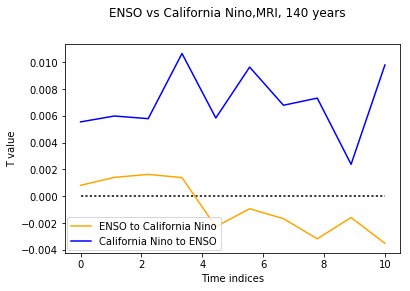

In [26]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
x1 = np.linspace(0,10,10)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title(' ')

ax.set_xlabel('Time indices')
ax.set_ylabel('T value')
plt.suptitle("ENSO vs California Nino,MRI, 140 years")

zero = [0 for i in range(10)]

plt.plot(x1,zero,color="black",ls = "dotted")
plt.plot(x1,TEtoCfor140_mri,color= "orange",label = "ENSO to California Nino")
plt.plot(x1,TCtoEfor140_mri,color = "blue",label = "California Nino to ENSO")

plt.legend(bbox_to_anchor=(0.005, 0.17), loc=2, borderaxespad=0)
plt.savefig("EC10year_mri.png",format = "png",dpi = 500)

plt.show()

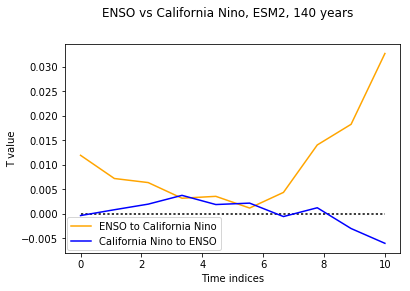

In [25]:
fig = plt.figure()
x1 = np.linspace(0,10,10)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title(' ')

ax.set_xlabel('Time indices')
ax.set_ylabel('T value')
plt.suptitle("ENSO vs California Nino, ESM2, 140 years")

zero = [0 for i in range(10)]

plt.plot(x1,zero,color="black",ls = "dotted")
plt.plot(x1,TEtoCfor140_ESM2,color= "orange",label = "ENSO to California Nino")
plt.plot(x1,TCtoEfor140_ESM2,color = "blue",label = "California Nino to ENSO")

plt.legend(bbox_to_anchor=(0.005, 0.17), loc=2, borderaxespad=0)
plt.savefig("EC10year_ESM2.png",format = "png",dpi = 500)

plt.show()

In [10]:
i = list(range(10))

In [11]:
print(i)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [27]:
TEtoCfor140_mri_1 = [] ### T El nino to California nino for each 50 years with 1-year gap for 140 years from MRI data
TCtoEfor140_mri_1 = [] ### T California Nino to El nino for each 50 years with 1-year gap for 140 years from MRI data

for i in range(1080):
    TEtoC = T_2_to_1(cni_mri[1*i:1*i+601],nino3_mri[1*i:1*i+601])
    TCtoE = T_2_to_1(nino3_mri[1*i:1*i+601],cni_mri[1*i:1*i+601])
    TEtoCfor140_mri_1.append(TEtoC)
    TCtoEfor140_mri_1.append(TCtoE)
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

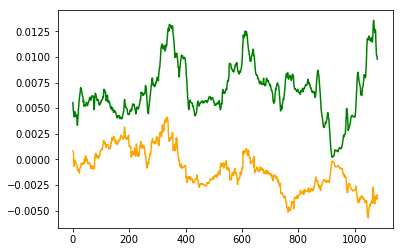

In [28]:
x2 = np.linspace(0,1080,1080)

plt.plot(x2,TEtoCfor140_mri_1,color= "orange")
plt.plot(x2,TCtoEfor140_mri_1,color = "green")
plt.show()

11.900851387860552 -0.4144532692338103
7.159069741864987 0.7762135215664846
6.327309847904923 1.9202283048749957
3.1287128308765366 3.7158020436906467
3.514806017715875 1.838635469438354
1.121536718928766 2.126910600208168
4.317321755354168 -0.6164720916011855
14.015775219219531 1.1821318606911126
18.237126277500938 -3.0645109301727884
32.70703046221196 -6.084430635087154


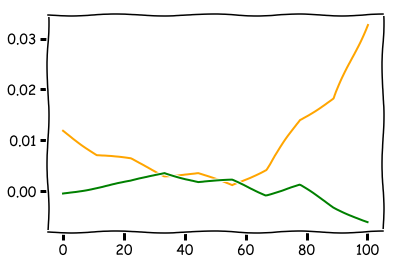

In [29]:
TEtoCfor140_ESM2 = [] ### T El nino to California nino for each 50 years with 10-year gap for 140 years from MRI data
TCtoEfor140_ESM2 = [] ### T California Nino to El nino for each 50 years with 10-year gap for 140 years from MRI data

for i in range(10):
    TEtoC = T_2_to_1(cni_ESM2[120*i:120*i+601],nino3_ESM2[120*i:120*i+601])
    TCtoE = T_2_to_1(nino3_ESM2[120*i:120*i+601],cni_ESM2[120*i:120*i+601])
    print(TEtoC*1000,TCtoE*1000)
    TEtoCfor140_ESM2.append(TEtoC)
    TCtoEfor140_ESM2.append(TCtoE)

x1 = np.linspace(0,100,10)
with plt.xkcd():
    plt.plot(x1,TEtoCfor140_ESM2,color= "orange")
    plt.plot(x1,TCtoEfor140_ESM2,color = "green")
    plt.show()

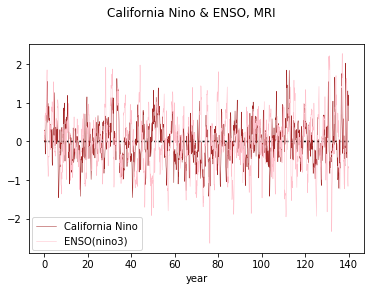

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title(' ')

ax.set_xlabel('year')
ax.set_ylabel('')
plt.suptitle("California Nino & ENSO, MRI")

x1 = np.linspace(0,140,140*12)
zero = [0 for i in range(140*12)]

plt.plot(x1,zero,color = "black",ls="dotted")
plt.plot(x1,cni_mri,color= "brown",linewidth = 0.5,label = "California Nino")
plt.plot(x1,nino3_mri,color = "pink",linewidth = 0.5,label = "ENSO(nino3)")

plt.legend(bbox_to_anchor=(0.01, 0.17), loc=2, borderaxespad=0)
plt.savefig("MRI_140.png",format = "png",dpi = 500)
plt.show()


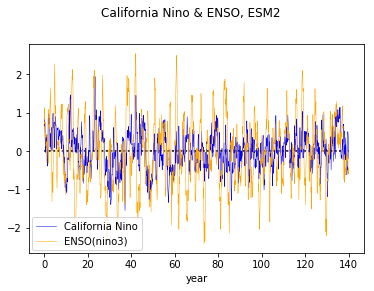

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title(' ')

ax.set_xlabel('year')
ax.set_ylabel('')
plt.suptitle("California Nino & ENSO, ESM2")

x1 = np.linspace(0,140,140*12)
zero = [0 for i in range(140*12)]

plt.plot(x1,zero,color = "black",ls="dotted")
plt.plot(x1,cni_ESM2,color= "blue",linewidth = 0.5,label = "California Nino")
plt.plot(x1,nino3_ESM2,color = "orange",linewidth = 0.5,label = "ENSO(nino3)")

plt.legend(bbox_to_anchor=(0.01, 0.17), loc=2, borderaxespad=0)
plt.savefig("ESM2_140.png",format = "png",dpi = 500)
plt.show()


In [32]:
T_ESM2_to_mri = T_2_to_1(cni_mri,cni_ESM2)
print(T_ESM2_to_mri)
T_mri_to_ESM2 = T_2_to_1(cni_ESM2,cni_mri)
print(T_mri_to_ESM2)

0.0010128375592972823
5.290658639836852e-05


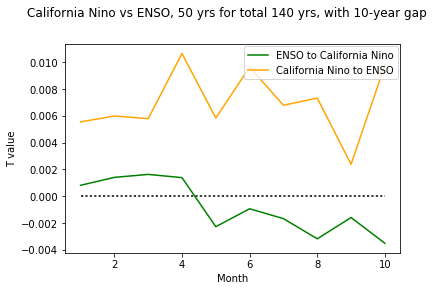

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title(' ')

ax.set_xlabel('Month')
ax.set_ylabel('T value')
plt.suptitle("California Nino vs ENSO, 50 yrs for total 140 yrs, with 10-year gap")

x3 = np.linspace(1,10,10)
zero = [0 for i in range(10)]

plt.plot(x3,zero,color = "black",ls="dotted")
plt.plot(x3,TEtoCfor140_mri,color= "green",label = "ENSO to California Nino")
plt.plot(x3,TCtoEfor140_mri,color= "orange",label = "California Nino to ENSO")

plt.legend(bbox_to_anchor=(0.535, 0.99), loc=2, borderaxespad=0)
plt.savefig("ACmonth.png",format = "png",dpi = 500)
plt.show()